In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_10_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_10_3.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.2757 - accuracy: 0.8891 - val_loss: 0.2218 - val_accuracy: 0.9114
Epoch 2/100
100000/100000 - 2s - loss: 0.2139 - accuracy: 0.9135 - val_loss: 0.2092 - val_accuracy: 0.9144
Epoch 3/100
100000/100000 - 2s - loss: 0.2064 - accuracy: 0.9147 - val_loss: 0.2048 - val_accuracy: 0.9141
Epoch 4/100
100000/100000 - 2s - loss: 0.1991 - accuracy: 0.9151 - val_loss: 0.1944 - val_accuracy: 0.9156
Epoch 5/100
100000/100000 - 2s - loss: 0.1829 - accuracy: 0.9196 - val_loss: 0.1730 - val_accuracy: 0.9234
Epoch 6/100
100000/100000 - 2s - loss: 0.1575 - accuracy: 0.9272 - val_loss: 0.1443 - val_accuracy: 0.9308
Epoch 7/100
100000/100000 - 2s - loss: 0.1351 - accuracy: 0.9354 - val_loss: 0.1299 - val_accuracy: 0.9377
Epoch 8/100
100000/100000 - 2s - loss: 0.1188 - accuracy: 0.9435 - val_loss: 0.1212 - val_accuracy: 0.9422
Epoch 9/100
100000/100000 - 2s - loss: 0.1086 - accuracy: 0.9490 - val_loss: 0.1086 - val_accu

Epoch 77/100
100000/100000 - 2s - loss: 0.0227 - accuracy: 0.9902 - val_loss: 0.0481 - val_accuracy: 0.9824
Epoch 78/100
100000/100000 - 2s - loss: 0.0207 - accuracy: 0.9909 - val_loss: 0.0500 - val_accuracy: 0.9824
Epoch 79/100
100000/100000 - 2s - loss: 0.0202 - accuracy: 0.9911 - val_loss: 0.0480 - val_accuracy: 0.9834
Epoch 80/100
100000/100000 - 2s - loss: 0.0219 - accuracy: 0.9906 - val_loss: 0.0500 - val_accuracy: 0.9825
Epoch 81/100
100000/100000 - 2s - loss: 0.0203 - accuracy: 0.9911 - val_loss: 0.0558 - val_accuracy: 0.9817
Epoch 82/100
100000/100000 - 2s - loss: 0.0219 - accuracy: 0.9907 - val_loss: 0.0544 - val_accuracy: 0.9807
Epoch 83/100
100000/100000 - 2s - loss: 0.0210 - accuracy: 0.9908 - val_loss: 0.0486 - val_accuracy: 0.9835
Epoch 84/100
100000/100000 - 2s - loss: 0.0179 - accuracy: 0.9920 - val_loss: 0.0502 - val_accuracy: 0.9825
Epoch 85/100
100000/100000 - 2s - loss: 0.0207 - accuracy: 0.9912 - val_loss: 0.0505 - val_accuracy: 0.9825
Epoch 86/100
100000/100000 -

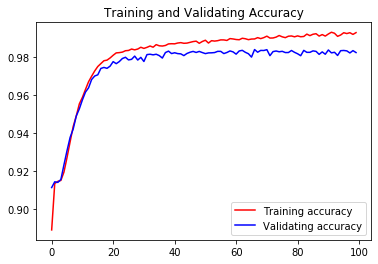

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_10_3_model.h5')